In [1]:

import numpy as np
import seaborn as sns
import warnings
import tqdm

from rich import print
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

warnings.filterwarnings("ignore")

## Questão 01

In [2]:


class Newton():

    def __init__(self, 
                 tol: float = 10e-6, 
                 max_iter: int = 100
                 ) -> None:
        self.tol = tol
        self.max_iter = max_iter
        pass

    def _estimate_jacobian(self, 
                           f: 'function', 
                           x: np.array,
                           step: float = 10e-2
                           ) -> np.array:
        
        n = len(x)
        J = np.zeros((n, n))

        for i in range(n):
            x_plus = np.copy(x)
            x_plus[i] += step
            J[:, i] = (f(x_plus) - f(x)) / step
        return J

    def _handle_converged(self,
                          x: np.array, 
                          iter: int) -> None:
        
        print(100 * '=')
        print(f'Método {self.last_used_method}')
        if self.estimated_jacobian:
            print(' (Jacobiana estimada computacionalmente)')
        print(100 * '-')
        print(f'Iterações:')
        print(f'    {iter + 1}')
        print(f'Tolerância: ')
        print(f'    {self.tol}')
        print(f'Resultado: (Arredondado)')
        print(f'    {np.round(x, 3)}')
        print(100 * '=')
        print('')
        return
    
    def _handle_not_converged(self) -> None:
        print(
            f'Método {self.last_used_method} não convergiu ' +
            f'mesmo em {self.max_iter + 1} iteraçẽos.'
            )

    def solve(self, 
              F: 'function', 
              x0: np.array, 
              J: 'function' = None
              ) -> np.array:
        
        self.estimated_jacobian = J is None
        self.last_used_method = 'Newton'
        
        xk = x0.copy()
        for k in range(self.max_iter):
            Fk = F(xk)
            
            if not J:
                Jk = self._estimate_jacobian(F, xk)
            else:
                Jk = J(xk)
            
            step = np.linalg.solve(Jk, -Fk)

            xk_new = xk + step

            if (np.linalg.norm(Fk, ord=np.inf) <= self.tol) \
            or (np.linalg.norm(step, ord=np.inf) <= self.tol):
                self._handle_converged(xk, k)
                return xk

            xk = xk_new

        self._handle_not_converged()
        
    
    def solve_modified(self, 
                       F: 'function', 
                       x0: np.array, 
                       J: 'function' = None
                       ) -> np.array:
        
        self.estimated_jacobian = J is None
        self.last_used_method = 'Newton Modificado'

        xk = x0
        for k in range(self.max_iter):
            
            Fk = F(xk)

            if k == 0:
                if not J:
                    Jk = self._estimate_jacobian(F, xk)
                else:
                    Jk = J(xk)

            step = np.linalg.solve(Jk, -Fk)

            xk_new = xk + step

            if (np.linalg.norm(Fk, ord=np.inf) <= self.tol) \
            or (np.linalg.norm(step, ord=np.inf) <= self.tol):
                self._handle_converged(xk_new, k)
                return xk_new
            
            xk = xk_new
        
        self._handle_not_converged()



In [3]:

def F(x: np.array) -> np.array:
    return np.array([
        3 * x[0]**3 + 2 * x[1] - 5 + np.sin(x[0] - x[1]) * np.sin(x[0] + x[1]),
        -x[0] * np.exp(x[0] - x[1]) + x[1] * (4 + 3 * x[1]**2) + 2 * x[1 + 1] + np.sin(x[1] - x[1 + 1]) * np.sin(x[1] + x[1 + 1]) - 8,
        -x[1] * np.exp(x[1] - x[2]) + x[2] * (4 + 3 * x[2]**2) + 2 * x[2 + 1] + np.sin(x[2] - x[2 + 1]) * np.sin(x[2] + x[2 + 1]) - 8,
        -x[2] * np.exp(x[2] - x[3]) + x[3] * (4 + 3 * x[3]**2) + 2 * x[3 + 1] + np.sin(x[3] - x[3 + 1]) * np.sin(x[3] + x[3 + 1]) - 8,
        -x[3] * np.exp(x[3] - x[4]) + x[4] * (4 + 3 * x[4]**2) + 2 * x[4 + 1] + np.sin(x[4] - x[4 + 1]) * np.sin(x[4] + x[4 + 1]) - 8,
        -x[4] * np.exp(x[4] - x[5]) + x[5] * (4 + 3 * x[5]**2) + 2 * x[5 + 1] + np.sin(x[5] - x[5 + 1]) * np.sin(x[5] + x[5 + 1]) - 8,
        -x[5] * np.exp(x[5] - x[6]) + x[6] * (4 + 3 * x[6]**2) + 2 * x[6 + 1] + np.sin(x[6] - x[6 + 1]) * np.sin(x[6] + x[6 + 1]) - 8,
        -x[6] * np.exp(x[6] - x[7]) + x[7] * (4 + 3 * x[7]**2) + 2 * x[7 + 1] + np.sin(x[7] - x[7 + 1]) * np.sin(x[7] + x[7 + 1]) - 8,
        -x[7] * np.exp(x[7] - x[8]) + x[8] * (4 + 3 * x[8]**2) + 2 * x[8 + 1] + np.sin(x[8] - x[8 + 1]) * np.sin(x[8] + x[8 + 1]) - 8,
        -x[8] * np.exp(x[8] - x[9]) + 4 * x[9] - 3
    ], dtype=float)

x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=float)


In [4]:

newton = Newton(tol=10**(-4), max_iter=100_000)
newton.solve(F, x0)
newton.solve_modified(F, x0)


====================================================================================================

Método Newton

(Jacobiana estimada computacionalmente)

----------------------------------------------------------------------------------------------------

Iterações:

10

Tolerância:

0.0001

Resultado: (Arredondado)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

====================================================================================================

Método Newton Modificado não convergiu mesmo em 100001 iteraçẽos.

## Questão 02

In [5]:

def polinomio_k(k: int, f, X: np.array, y: np.array, x: float) -> float:

    distancias = np.abs(X - x)
    idx = np.argsort(distancias)[:k + 1]
    _y = y[idx]
    _X = X[idx]

    n = _y.shape[0]
    A = np.zeros((n, k + 1))

    A[:, 0] = 1
    for i in range(1, k + 1):
        A[:, i] = _X ** (i)

    # Utiliza minimos quadrados
    a = np.linalg.lstsq(A, _y, rcond=None)[0]

    r = a[0]
    for i in range(1, k + 1):
        r += a[i] * (x ** i)

    return r


def spline_linear(f, X: np.array, x: float) -> float:
    
    X = np.sort(X)
    i = np.searchsorted(X, x)

    if i == 0: i = 1
    elif i == len(X): i -= 1

    y = (f(X[i - 1]) * ((X[i] - x) / (X[i] - X[i - 1]))) + (f(X[i]) * ((x - X[i - 1]) / (X[i] - X[i - 1]))) 

    return y


def spline_cubica(f, X: np.array, x: float) -> float:
    
    n = len(X) - 1
    h = np.diff(X)
    
    # Matriz tridiagonal para os coeficientes
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    # Preencher as equações para as derivadas segundas
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i] 
        b[i] = (3 / h[i]) * (f(X[i+1]) - f(X[i])) - (3 / h[i-1]) * (f(X[i]) - f(X[i-1]))

    # Condições da spline natural (segunda derivada zero nos extremos)
    A[0, 0] = 1
    A[n, n] = 1
    
    # Resolver o sistema linear para obter as segundas derivadas
    c = np.linalg.solve(A, b)
    
    # Encontrar o intervalo que contém x
    i = np.searchsorted(X, x) - 1
    if i < 0:
        i = 0
    elif i >= n:
        i = n - 1
    
    # Calcular os coeficientes do polinômio cúbico
    a = f(X[i])
    b = (f(X[i+1]) - f(X[i])) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
    d = (c[i+1] - c[i]) / (3 * h[i])
    
    # Calcular o valor da spline cúbica
    dx = x - X[i]
    y = a + b * dx + c[i] * dx**2 + d * dx**3
    
    return y



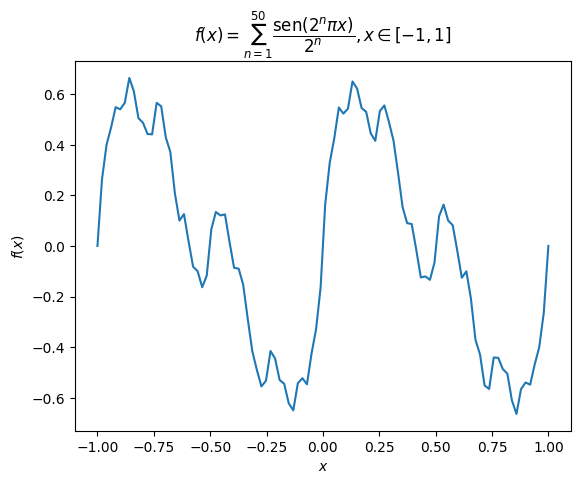

In [6]:

def f(x, max_n = 50):
    y = 0

    for n in range(1, max_n, 1):
        y += np.sin(2**n * np.pi * x) / 2**n
        
    return y

X = np.linspace(-1, 1, 100)
y = np.array([f(x, 50) for x in X], dtype=float)

plt.title(r'$f(x) = \sum_{n=1}^{50}\dfrac{\text{sen}(2^n \pi x)}{2^n}, x \in [-1, 1]$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
sns.lineplot(x=X, y=y)

plt.savefig('AVA02_Q02_F01.png')


In [7]:

y_spline_linear = np.array([spline_linear(f, X, x) for x in tqdm.tqdm(X)], dtype=float)
y_spline_cubica = np.array([spline_cubica(f, X, x) for x in tqdm.tqdm(X)], dtype=float)

y_polinomial_k06 = np.array([polinomio_k(6, f, X, y, x) for x in tqdm.tqdm(X)], dtype=float)
y_polinomial_k12 = np.array([polinomio_k(12, f, X, y, x) for x in tqdm.tqdm(X)], dtype=float)
y_polinomial_k15 = np.array([polinomio_k(15, f, X, y, x) for x in tqdm.tqdm(X)], dtype=float)


100%|██████████| 100/100 [00:00<00:00, 10438.53it/s]


In [8]:
# Validando interpolacao linear
S1 = interp1d(X, y, kind='linear')
err1 = np.sum(np.abs(np.round(S1(X) - y_spline_linear, 5)))

S3 = interp1d(X, y, kind='cubic')
err3 = np.sum(np.abs(np.round(S1(X) - y_spline_cubica, 5)))

print('Validação dos meus métodos:')
print(f'Erro no meu método de interpolação linear frente ao da biblioteca {err1}')
print(f'Erro no meu método de interpolação cúbica frente ao da biblioteca {err3}')


Validação dos meus métodos:

Erro no meu método de interpolação linear frente ao da biblioteca 0.0

Erro no meu método de interpolação cúbica frente ao da biblioteca 0.0

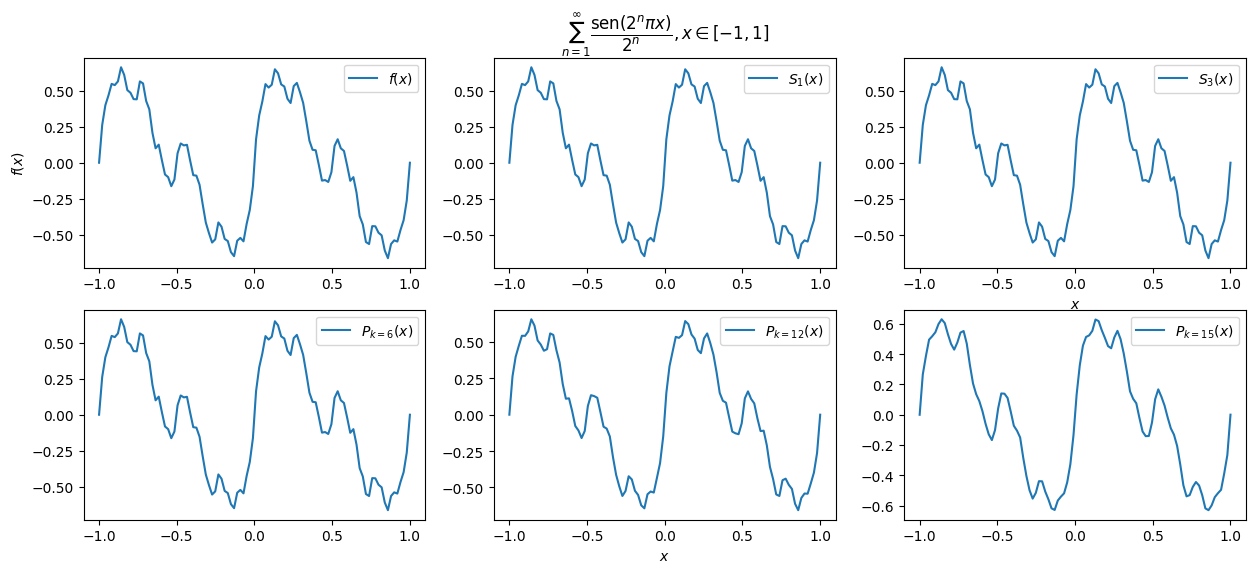

In [9]:

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

axes[0, 0].set_ylabel(r'$f(x)$')
sns.lineplot(ax=axes[0, 0], x=X, y=y, label=r'$f(x)$')

sns.lineplot(ax=axes[0, 1], x=X, y=y_spline_linear, label=r'$S_1(x)$')
axes[0, 1].set_title(r'$\sum_{n=1}^{\infty}\dfrac{\text{sen}(2^n \pi x)}{2^n}, x \in [-1, 1]$')

sns.lineplot(ax=axes[0, 2], x=X, y=y_spline_cubica, label=r'$S_3(x)$')
axes[0, 2].set_xlabel(r'$x$')

sns.lineplot(ax=axes[1, 0], x=X, y=y_polinomial_k06, label=r'$P_{k=6}(x)$')

sns.lineplot(ax=axes[1, 1], x=X, y=y_polinomial_k12, label=r'$P_{k=12}(x)$')
axes[1, 1].set_xlabel(r'$x$')

sns.lineplot(ax=axes[1, 2], x=X, y=y_polinomial_k15, label=r'$P_{k=15}(x)$')


plt.savefig('AVA02_Q02_F02.png')


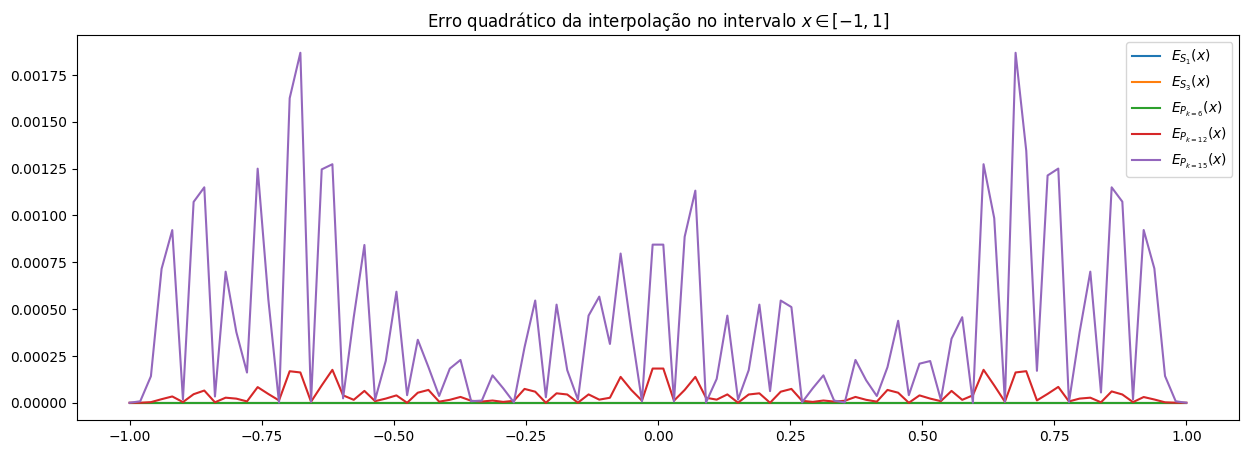

In [10]:


#fig, axes = plt.subplots(5, 1, figsize=(10, 15))

plt.figure(figsize=(15, 5))
plt.title(r'Erro quadrático da interpolação no intervalo $x \in [-1, 1]$')

err_y_spline_linear = np.power(y - y_spline_linear, 2)
sns.lineplot(x=X, y=err_y_spline_linear, label=r'$E_{S_1}(x)$')

err_y_spline_cubica = np.power(y - y_spline_cubica, 2)
sns.lineplot(x=X, y=err_y_spline_cubica, label=r'$E_{S_3}(x)$')

err_y_polinomial_k06 = np.power(y - y_polinomial_k06, 2)
sns.lineplot(x=X, y=err_y_polinomial_k06, label=r'$E_{P_{k=6}}(x)$')

err_y_polinomial_k12 = np.power(y - y_polinomial_k12, 2)
sns.lineplot(x=X, y=err_y_polinomial_k12, label=r'$E_{P_{k=12}}(x)$')

err_y_polinomial_k15 = np.power(y - y_polinomial_k15, 2)
sns.lineplot(x=X, y=err_y_polinomial_k15, label=r'$E_{P_{k=15}}(x)$')


plt.savefig('AVA02_Q02_F03.png')


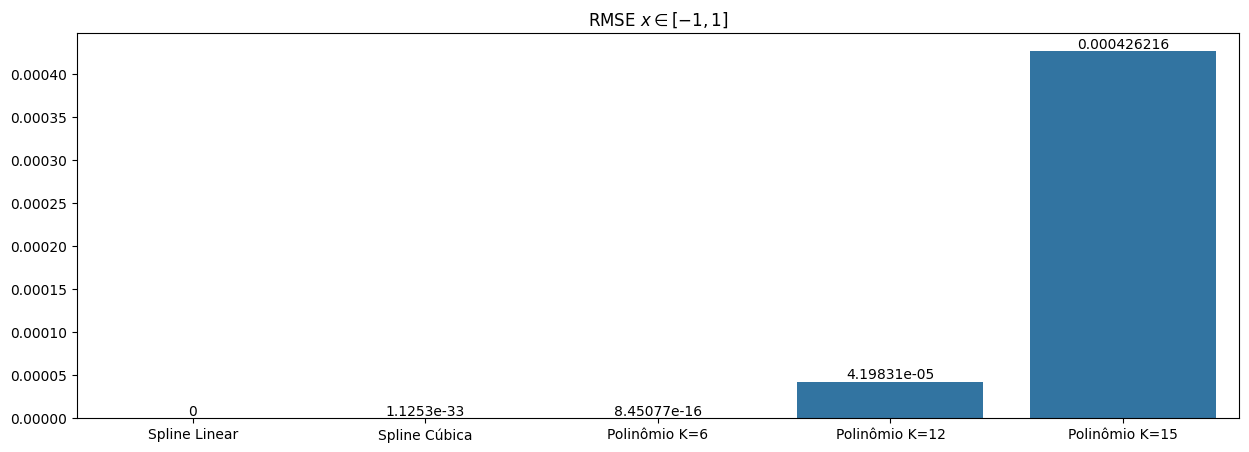

In [11]:

plt.figure(figsize=(15, 5))
plt.title(r'RMSE $x \in [-1, 1]$')

erros = {
    'Spline Linear': np.mean(err_y_spline_linear), 
    'Spline Cúbica': np.mean(err_y_spline_cubica), 
    'Polinômio K=6': np.mean(err_y_polinomial_k06), 
    'Polinômio K=12': np.mean(err_y_polinomial_k12), 
    'Polinômio K=15': np.mean(err_y_polinomial_k15)
}

ax = sns.barplot(x=erros.keys(), y=erros.values())
ax.bar_label(ax.containers[0])


plt.savefig('AVA02_Q02_F04.png')


## Questão 03

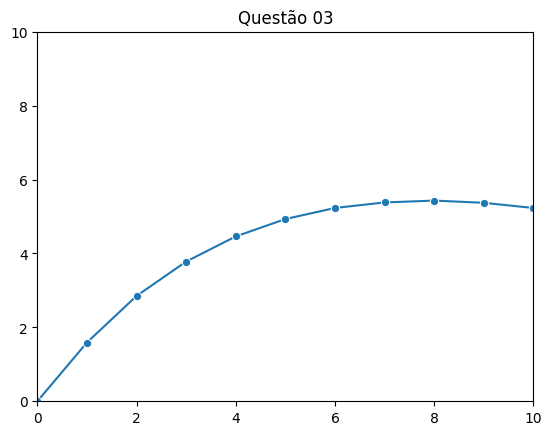

In [12]:

def minimos_quadrados(x: np.array, y: np.array) -> tuple[float, float]:

    n = y.shape[0]
    sum_of_x = np.sum(x)
    sum_of_y = np.sum(y)
    sum_of_x_times_y = np.sum(x * y)
    sum_of_x_squared = np.sum(np.power(x, 2))

    # Coeficiente angular (b)
    b = (n * sum_of_x_times_y - sum_of_x * sum_of_y) / (n * sum_of_x_squared - sum_of_x**2)

    # Intercepto (a)
    a = (sum_of_y - b * sum_of_x) / n
    
    return a, b


x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
y = np.array([0.00, 1.59, 2.85, 3.78, 4.46, 4.93, 5.23, 5.38, 5.43, 5.37, 5.23], dtype=float)

plt.title('Questão 03')
plt.ylim(0, 10)
plt.xlim(0, 10)
sns.lineplot(x=x, y=y, marker='o')


plt.savefig('AVA02_Q03_F01.png')


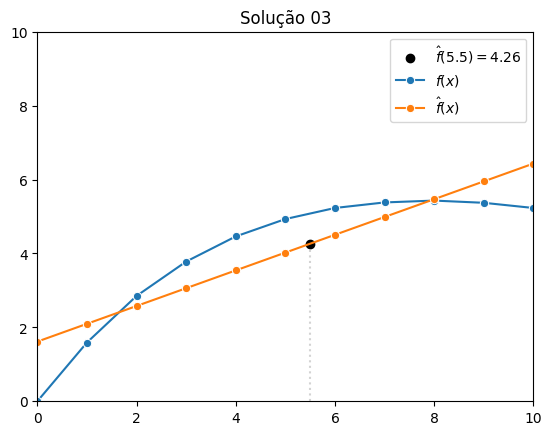

In [13]:

a, b = minimos_quadrados(x, y)
g = lambda x:a + b * x 

y_hat = g(x)
x_point = 5.5
y_point = g(x_point)

plt.scatter(x_point, y_point, color='black', label=r'$\hat{f}(5.5) = ' + str(round(y_point, 2)) + r'$')
plt.vlines(x_point, ymin=0, ymax=y_point-0.1, colors='lightgray', linestyles='dotted')
sns.lineplot(x=x, y=y, label=r'$f(x)$', marker='o')
sns.lineplot(x=x, y=y_hat, label=r'$\hat{f}(x)$', marker='o')

plt.title('Solução 03')
plt.xlim(0, 10)
plt.ylim(0, 10)


plt.savefig('AVA02_Q03_F02.png')
plt.show()



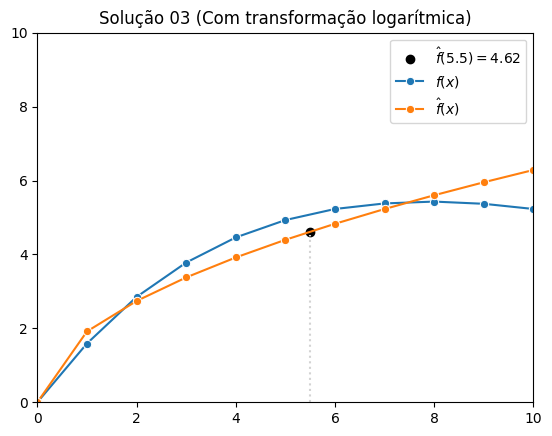

In [14]:

a, b = minimos_quadrados(np.log(x[1:]), np.log(y[1:]))
g = lambda x: np.exp(a + b * np.log(x))

y_hat = g(x)
x_point = 5.5
y_point = g(x_point)

plt.scatter(x_point, y_point, color='black', label=r'$\hat{f}(5.5) = ' + str(round(y_point, 2)) + r'$')
plt.vlines(x_point, ymin=0, ymax=y_point-0.1, colors='lightgray', linestyles='dotted')
sns.lineplot(x=x, y=y, label=r'$f(x)$', marker='o')
sns.lineplot(x=x, y=y_hat, label=r'$\hat{f}(x)$', marker='o')

plt.title('Solução 03 (Com transformação logarítmica)')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.savefig('AVA02_Q03_F03.png')
plt.show()


## Questão 04

In [15]:
def integrar_simpson(f: 'function', 
                     h: float, 
                     a: float, 
                     b: float, 
                     verbose: bool = True
                     ) -> float:

    m = int(np.ceil((b - a) / h))
    x = np.linspace(a, b, m + 1, dtype=np.float32)

    x_i_odd = x[range(2, m, 2)]
    x_i_even = x[range(1, m, 2)]

    y = (h / 3) * (f(x[0]) + np.sum(2 * f(x_i_odd)) + np.sum(4 * f(x_i_even)) + f(x[-1]))
    err = (m * h**5) / 180 * (np.max(f(x)))

    if verbose:
        print(f'Limitante de erro = |{err}|')

    return y

def integrar_quadratura_gaussiana(f: 'function', 
                                  a: float, 
                                  b: float, 
                                  n: int,
                                  verbose: bool = True
                                  ) -> float:
    
    x, w = np.polynomial.legendre.leggauss(n)

    _x = 0.5 * (x * (b - a) + (b + a))
    _w = 0.5 * (w * (b - a))

    y = sum(w_i * f(x_i) for x_i, w_i in zip(_x, _w))

    return y

def regra_dos_trapezios(f, a, b, n):

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    
    y = f(x)
    
    integral = (h / 2) * (y[0] + 2 * sum(y[1:-1]) + y[-1])
    
    return integral


In [16]:
f = lambda x: np.log(x) / np.sqrt(x)
a = 0.5
b = 2.0

In [17]:
n = 4
area_trap = regra_dos_trapezios(f, a, b, n)
area_trap

np.float64(0.07223764734676125)

In [18]:

h = (b - a) / 4
area_simps = integrar_simpson(f, h, a, b)
area_simps


Limitante de erro = |8.077078382484615e-05|

np.float32(0.107686564)

In [19]:

n = 4
area_qg = integrar_quadratura_gaussiana(f, a, b, n)
area_qg


np.float64(0.11258449330843046)

In [20]:

f_integrada = lambda x: 2 * np.sqrt(x) * np.log(x) - 4 * np.sqrt(x)
area = f_integrada(2) - f_integrada(0.5)
area


np.float64(0.11234730565945172)

{
    'Integral verdadeira': np.float64(0.11234730565945172),
    'Quadratura Gaussiana': np.float64(0.11258449330843046),
    'Simpson': np.float32(0.107686564),
    'Trapézios': np.float64(0.07223764734676125)
}

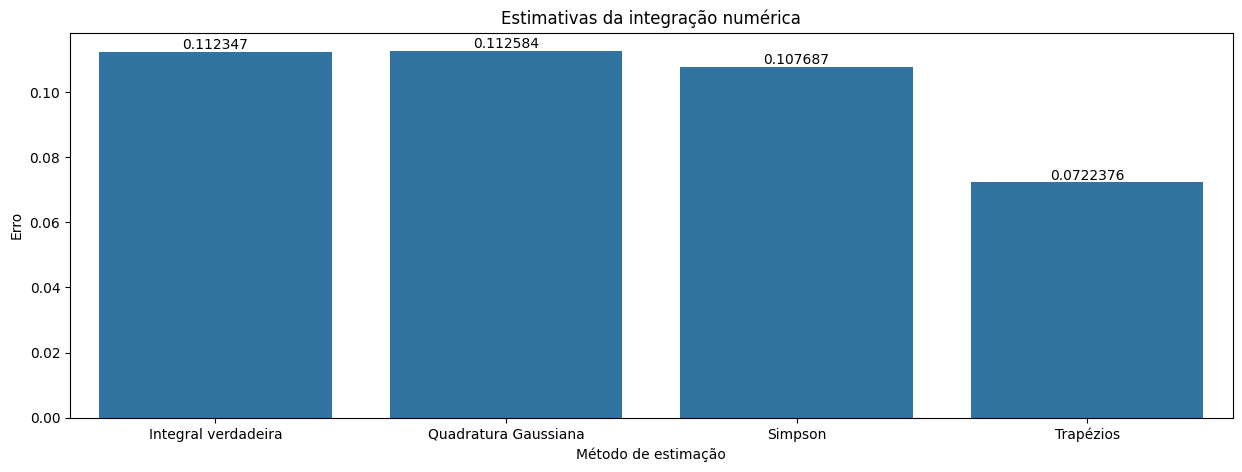

In [21]:
plt.figure(figsize=(15, 5))
plt.title(r'Estimativas da integração numérica')

erros = {
    'Integral verdadeira': area,  
    'Quadratura Gaussiana': area_qg, 
    'Simpson': area_simps,
    'Trapézios': area_trap 
}

ax = sns.barplot(x=erros.keys(), y=erros.values())
ax.bar_label(ax.containers[0])

ax.set_ylabel('Erro')
ax.set_xlabel('Método de estimação')

print(erros)

plt.savefig('AVA02_Q04_F01.png')


{
    'Integral verdadeira': np.float64(0.0),
    'Quadratura Gaussiana': np.float64(0.00023718764897873168),
    'Simpson': np.float64(0.004660741333165408),
    'Trapézios': np.float64(0.04010965831269048)
}

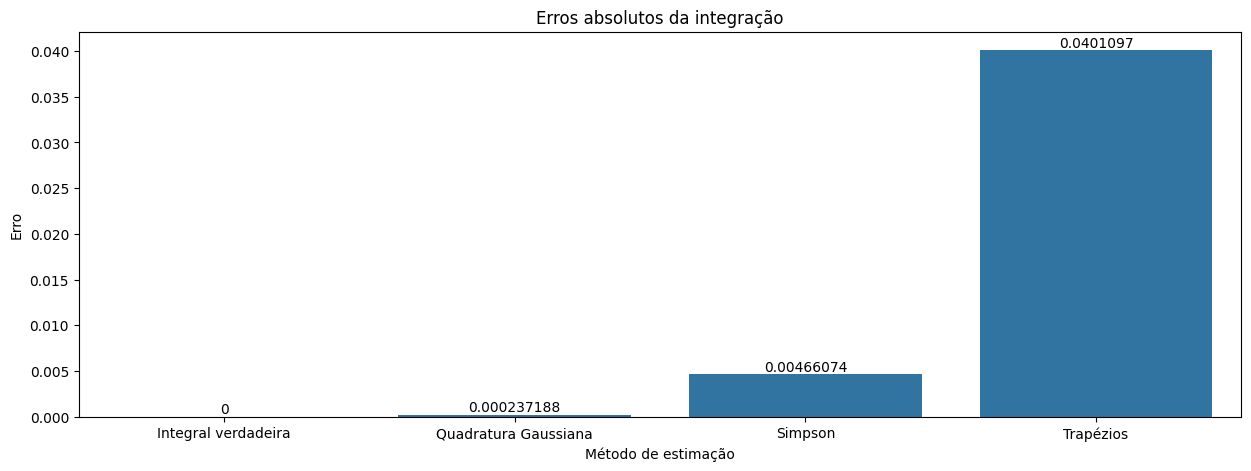

In [22]:
plt.figure(figsize=(15, 5))
plt.title(r'Erros absolutos da integração')

erros = {
    'Integral verdadeira': np.abs(area - area),  
    'Quadratura Gaussiana': np.abs(area_qg - area), 
    'Simpson': np.abs(area_simps - area),
    'Trapézios': np.abs(area_trap - area) 
}

ax = sns.barplot(x=erros.keys(), y=erros.values())
ax.bar_label(ax.containers[0])

ax.set_ylabel('Erro')
ax.set_xlabel('Método de estimação')

print(erros)

plt.savefig('AVA02_Q04_F02.png')


In [23]:

for n in range(1, 1000):
    
    area_trapezio_otima = regra_dos_trapezios(f, a, b, n)
    
    if np.abs(area_trapezio_otima - area) <= np.abs(area_qg - area):
        print(f'Seria menor considerando {n} subintervalos pela regra dos trapézios.')
        break



Seria menor considerando 54 subintervalos pela regra dos trapézios.

In [24]:

for n in range(1, 1000):

    h = (b - a) / n
    area_simps_otima = integrar_simpson(f, h, a, b, verbose=False)
    
    if np.abs(area_simps_otima - area) <= np.abs(area_qg - area):
        print(f'Seria menor considerando {n} subintervalos pela regra de Simpson.')
        break



Seria menor considerando 10 subintervalos pela regra de Simpson.